In [40]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Метод прямой выборки
Основан на том, что интегральная функция распределения
распределена равномерно, соответственно, если $\xi$ распределено
равномерно на отрезке [0, 1], то:
$$r= F^{-1}(\xi)$$

Имеет искомое распределения. Для дискретного распределения
вычисляются частичные суммы:
$$S_k = \sum_{i=1}^k P_i$$

тогда номер k, такой, что $S_{k−1}$ < $\xi$ <= $S_k$ и есть искомая
случайная величина.

### Метод Неймана (реджекций)
Плотность распределения не обязательно нормирована, но должна быть ограничена.

Процедура получения случайного числа r:

1. Генерируется пара $\xi$ $\eta$ равномерно распределенных на промежутке [0, 1]
2. Рассчитывается пара:
$$r = (b - a)\xi + a$$
$$\mu = M\eta$$

3. Если $\mu$ > f(r), то идем на шаг 1
4. r - величина, имеющая заданное распределение

### Метод Существенной выборки
Предыдущий метод может иметь очень низкую эффективность
($\epsilon = \frac{n_r}{N_u}$)
если распределение резко изменяется. Однако, можно
выделить резко изменяющуюся часть в следующем методе.
Допустим, плотность распределения может быть представлена
в виде: $$f(x) = g(x) \cdot h(x)$$
где h(x) также плотность распределения , к которой можно
применить метод прямой выборки, a g(x) ограничена
(0 <= g(x) <= M), тогда распределение $f(x)$ можно разыграть алгоритмом:
1. Генерируется случайная величина r, распределенная по h(r)
2. Генерируется случайная величина $\mu$, распределенная равномерно на отрезке [0, M]
3. Если $\mu > g(r)$ переход на шаг 1 иначе r  - искомая случайная величина

### Метод композиций
Если плотность распределения может быть представлена в виде взвешенной суммы: 
$$f(x) = \sum \alpha_ig_i(x)$$
$$\sum\alpha_i = 1$$

плотностей распределения $g_i(x)$, для которых может быть
использован метод прямой выборки, то соответствующие
случайные величины можно получить методом композиций:

1. Выбирается номер k в соответствии с дискретным распределением $\alpha_i$

2. Генерируется случайная величина r в соответствии с плотностью $g_k(x)$

### Метод композиций и реджекций
Допустим, функция, как в методе композиций, может быть представлена в виде
$$f(x) = \sum \alpha_i g_i(x)$$
но возможности использовать метод прямой выборки для $g_i(x)$ нет.
Почему бы, однако, не использовать ту же схему, но для каждой функции
$g_i(x)$ использовать метод Неймана? Можно, но не имеет смысла, т.к.
эффективность будет не лучше, а даже несколько хуже.
Однако, если для
всех, кроме одной, функций $g_i(x)$ может быть использован метод прямой
выборки, ситуация меняется. Будем, считать, что эта фунция имеет
индекс 1, ограничена (0 <= $g_1(x)$ <= M_1), все остальные фунции
нормированы на отрезке (этого всегда можно добиться, поделив их на $\int_a^bg_i(x)dx$).
Тогда выполним следующую последовательность:

1. Генерируется номер согласно дискретному распределению:
$$\beta_1 = \frac{M_1(b - a)}{M_1(b - a)\sum_{i=2}^{i=k}\alpha_i}$$

$$\beta_i = \frac{\alpha_i}{M_1(b - a) + \sum_{i=2}^{i=k}\alpha_i}, i =2..k$$
2. Если i > 1 результат -  прямой выборки
3. Если i = 1 результат - методом Неймана, с функцией $g_1(x)$, ограничением $M_1(x)$    


### My fucntion


In [41]:
a = -1
b = 1

def f(x):   
    return (1/(1 + x**2) + 1 + x)

In [42]:
x = np.arange(-1, 1, 1e-3)
f_array = []
for i in x:
    f_array.append(f(i))


In [43]:
import scipy.stats as sps

import time

r = np.random.uniform(a, b)
print(r)

0.6052126372966817


In [44]:
def generateNeuman(a, b):
    while True:  
        M = f(b)
        r = float(np.random.uniform(a, b))
        mu = float(np.random.uniform(0.0, M))
        
        if mu <= f(r): 
            return r

In [45]:
array_for_hist = []
t1 = time.time()
for i in range(0, 100000):
    value = generateNeuman(a, b)
    array_for_hist.append(value)
t2 = time.time()


0.4842243194580078


<AxesSubplot: ylabel='Count'>

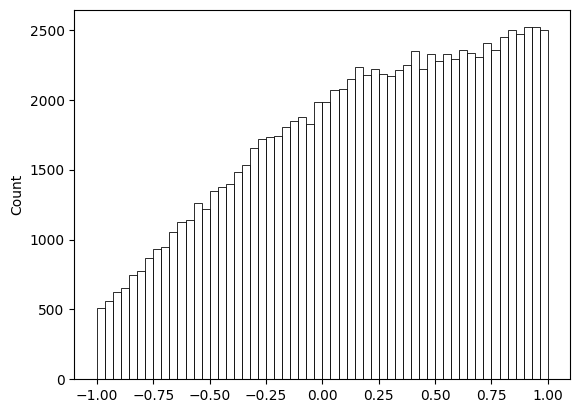

In [46]:
print(t2 - t1)

sns.histplot(array_for_hist, color='white')


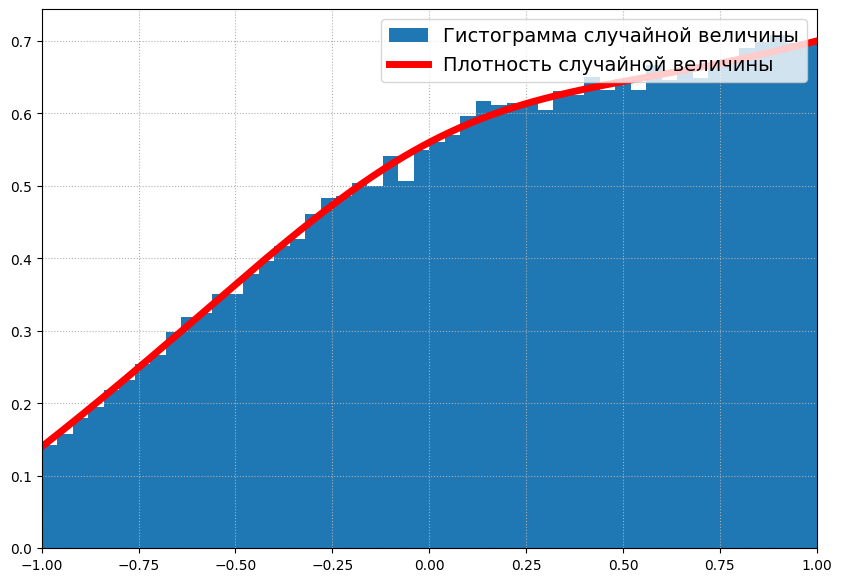

In [47]:
plt.figure(figsize=(10, 7))
fit_function_array = []
for i in range(len(f_array)):
   fit_function_array.append(f_array[i]*0.28)
    
plt.hist(array_for_hist,  bins=50, density=True, alpha=1, 
         label='Гистограмма случайной величины') 
plt.plot(x, fit_function_array, color='red', lw=5, 
         label='Плотность случайной величины') 
plt.xlim(-1, 1)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')
plt.show()

In [48]:
print(np.mean(array_for_hist))
print(np.std(array_for_hist))

0.18917213609082137
0.5212126751174215


Значения вычисленные по точным формулам:

$\overline{x} = 0.1867 \pm 0.016$

$\sigma =  0.5216 \pm 0.012$

Попробуем метод Композиций и реджекций на функции

$f(x) = \sin^6(x) + (1 + x)^4$

Считаем методом неймана $f_1(x) = \sin^6(x)$

Методом прямой выборки $f_2(x) = (1+x)^4$

In [49]:
a = -3
b = 3

def second_func(x):
    return (sin(x))**6 + (1 + x)**4
    
def f1(x):
    return (sin(x))**6

#have x<0, need to do abs(модуль) or have error - complex values
def abs_and_pow(x,n):
    if x>=0:
        return pow(x,n)
    else:
        return -pow(-x,n)

с0 = (a+1)**5
с1 = (b+1)**5-(a+1)**5
    
def F2(x):
    return ((x+1)**5 - с0)/5
            
def F2rev(x):
    return (abs_and_pow(с1*x + с0, 0.2)-1)

In [50]:
M1 = f1(b)
gamma1 = F2(b)

def doCompRej(a,b,M1,gamma1,f1,F2rev):
    beta1 = M1*(b-a)/(M1*(b-a)+gamma1)
    while True:
        value = float(np.random.uniform(0, 1))
        if value > beta1:#прямая выборка
            r1 = float(np.random.uniform(0, 1))
            return F2rev(r1)
        else:#neuman
            mu = float(np.random.uniform(0, M1))
            r2 = float(np.random.uniform(a, b))
            if mu<f1(r2):
                return r2

In [51]:
array_for_hist = []
time1 = time.time()
for i in range (0, 10000):
    k = doCompRej(a,b, M1, gamma1, f1, F2rev)
    array_for_hist.append(k)
time2 = time.time()
print(time2 - time1)

0.0355224609375


In [52]:
x = np.arange(-3, 3, 1e-3)
f_array = []
for i in x:
    f_array.append(second_func(i))

<AxesSubplot: ylabel='Count'>

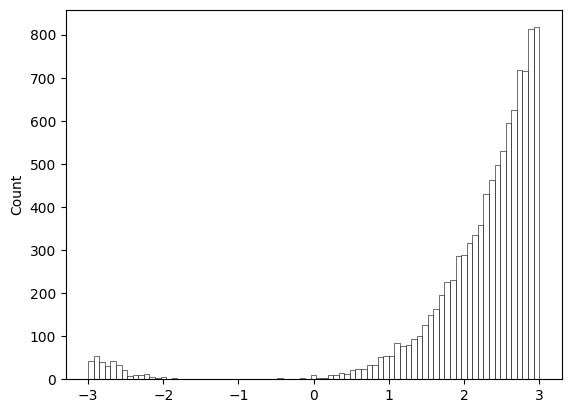

In [53]:
sns.histplot(array_for_hist, color='white')


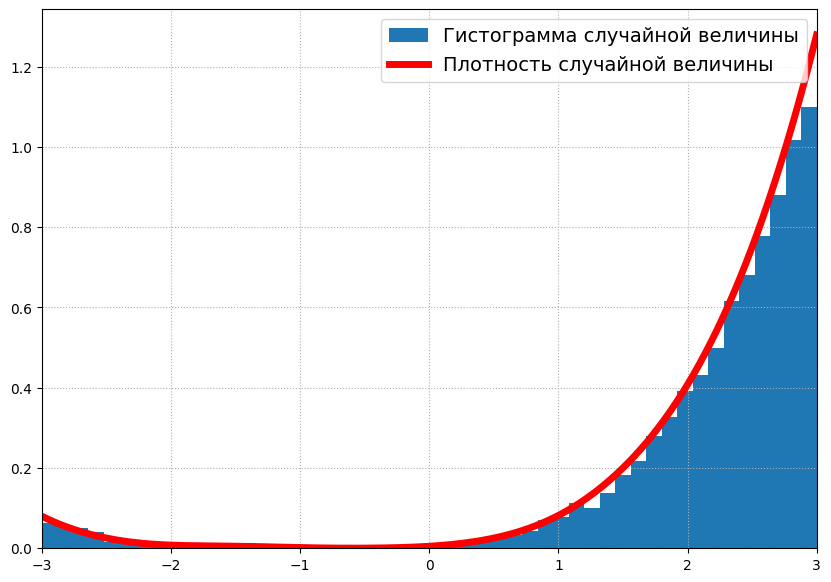

In [54]:
plt.figure(figsize=(10, 7))
fit_function_array = []
for i in range(len(f_array)):
   fit_function_array.append(f_array[i]*0.005)
    
plt.hist(array_for_hist,  bins=50, density=True, alpha=1, 
         label='Гистограмма случайной величины') 
plt.plot(x, fit_function_array, color='red', lw=5, 
         label='Плотность случайной величины') 
plt.xlim(-3, 3)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')
plt.show()

In [55]:
print(np.mean(array_for_hist))
print(np.std(array_for_hist))

2.170281493802488
1.041023944860779


Значения вычисленные по точным формулам:

$\overline{x} = 2.162 \pm 0.033$

$\sigma =  1.050 \pm 0.023$

Метод существенной выборки для функции

$(1+x)^6 + (1 - x)^6$

In [56]:
def f3(x):
    return ((1. + x)**6 +(1. - x)**6)

In [57]:
a = -1
b = 1
p = 3*2**(1/3)
def invF(x, a, b):
    temp = -27*a**3*x + 27*a**3 - 81*a*x + 81*a + 27*b**3*x + 81*b*x
    c = sqrt((temp)**2 + 2916) + temp
    new = c**(1/3)
    return new/p - p/new
def g(x):
    return 2*(x**4 + 14*x**2 + 1)
    
def method2():
    fmax = g(b)
    while True:
        r = invF(np.random.uniform(0, 1), a, b)
        nu = np.random.uniform(0, fmax)
        if (nu < g(r)):
            return r 

In [58]:
array_for_hist = []
time1 = time.time()
for i in range (0, 10000):
    k = method2()
    array_for_hist.append(k)
time2 = time.time()
print(time2 - time1)

0.11660122871398926


<AxesSubplot: ylabel='Count'>

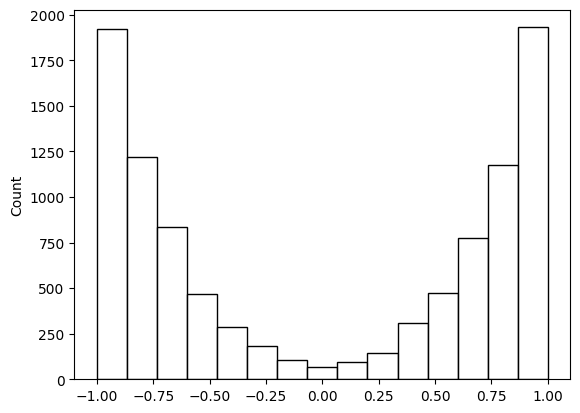

In [59]:
sns.histplot(array_for_hist, color='white')


In [60]:
x = np.arange(-1, 1, 1e-3)
f_array = []
for i in x:
    f_array.append(f3(i))

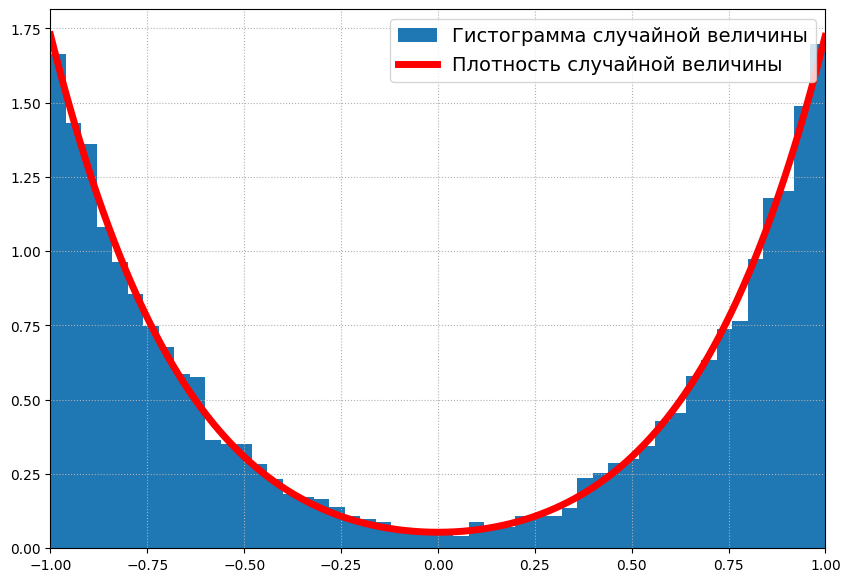

In [61]:
plt.figure(figsize=(10, 7))
fit_function_array = []
for i in range(len(f_array)):
   fit_function_array.append(f_array[i]*0.027)
    
plt.hist(array_for_hist,  bins=50, density=True, alpha=1, 
         label='Гистограмма случайной величины') 
plt.plot(x, fit_function_array, color='red', lw=5, 
         label='Плотность случайной величины') 
plt.xlim(-1, 1)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')
plt.show()

In [62]:
print(np.mean(array_for_hist))
print(np.std(array_for_hist))

-0.00622129307099762
0.7800718451777594


Значения вычисленные по точным формулам:

$\overline{x} = 0.0000 \pm 0.024$

$\sigma =  0.7817 \pm 0.018$

Метод композиций на функции

$(x^4 + 1 + \cos^2(x))$


In [70]:
a = -0.7
b = 0.7
norm = 1

#Исходная функция плотности вероятности
def f4(x): return (x**4 + 1. + cos(x)**2)


In [71]:
def F(x): return (x**5/5 + 3/2*x + sin(2*x)/4) #неопределенный интергал от плотности вероятности
#
def f1(x): return ((x**5)/5) 
def f2(x): return (3/2*x)
def f3(x): return (sin(2*x)/4)

bet1 = f1(b) - f1(a)
bet2 = f2(b) - f2(a)
bet3 = f3(b) - f3(a)

alf1 = bet1/(bet1 + bet2 + bet3)
alf2 = bet2/(bet1 + bet2 + bet3)
alf3 = bet3/(bet1 + bet2 + bet3)
#метод композиции  
def composition(norm, a, b): 
    k = np.random.uniform(0, 1)
    u = np.random.uniform(0, 1)

    if(k < alf1):
        if((5*(u*bet1 + f1(a))) < 0):
            r = -(-5*(u*bet1 + f1(a)))**(1/5)
        else:
            r = (5*(u*bet1 + f1(a)))**(1/5)
        
    elif(k < alf1 + alf2):
        r = 2/3*(u*bet2 + f2(a))
    else:
        r = 1/2*asin(4*(u*bet3 + f3(a)))
    return r

In [74]:
x = np.arange(-0.7, 0.7, 1e-3)
f_array = []
for i in x:
    f_array.append(f4(i))

In [75]:
array_for_hist = []
time1 = time.time()
for i in range (0, 10000):
    k = composition(1, a, b)
    array_for_hist.append(k)
time2 = time.time()
print(time2 - time1)

0.037122488021850586


<AxesSubplot: ylabel='Count'>

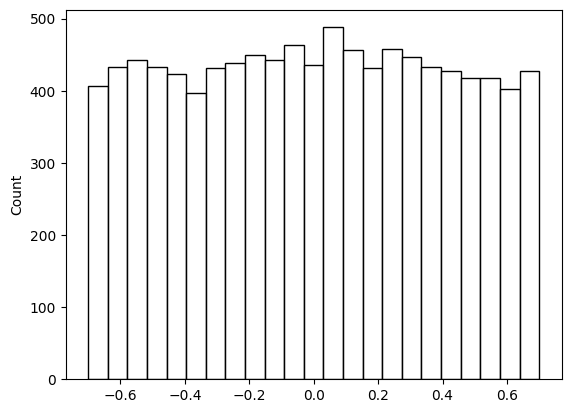

In [76]:
sns.histplot(array_for_hist, color='white')


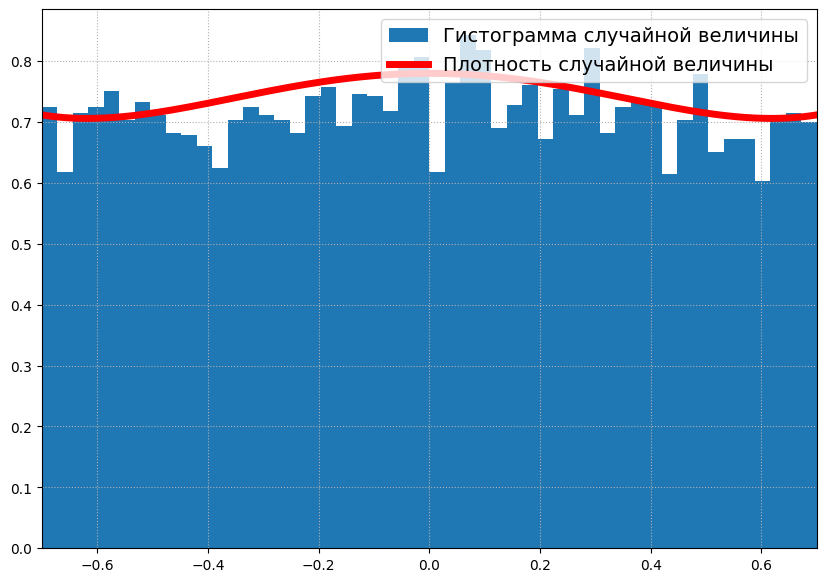

In [82]:
plt.figure(figsize=(10, 7))
fit_function_array = []
for i in range(len(f_array)):
   fit_function_array.append(f_array[i]*0.39)
    
plt.hist(array_for_hist,  bins=50, density=True, alpha=1, 
         label='Гистограмма случайной величины') 
plt.plot(x, fit_function_array, color='red', lw=5, 
         label='Плотность случайной величины') 
plt.xlim(-0.7, 0.7)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')
plt.show()

In [84]:
print(np.mean(array_for_hist))
print(np.std(array_for_hist))


-0.0003673749070122291
0.3991526870715422


Значения вычисленные по точным формулам:

$\overline{x} = 0.0000 \pm 0.013$

$\sigma =  0.398 \pm 0.009$